<a href="https://colab.research.google.com/github/harshaljanjani/everything-ml/blob/main/Data%20Analysis%20With%20Python/Bitcoin%20And%20Ether%20Prices%20Comparative%20Analytics%20(Day%209).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas: Data Science Python Package**

## 1) **Pandas:** Series
## 2) **Pandas:** Dataframes
## 3) **Pandas:** Reading CSV Files And Understanding Fundamental Matplotlib Plotting ✅

## **Dataset Used (CSV) :  BTC-Market-Price (One Column)**
## **Data Cleaning Procedure**

In [4]:
# Add "data/btc-market-price.csv" And "data/eth-price.csv" Into The Session Storage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv('data/btc-market-price.csv')
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [8]:
df.columns

Index(['2017-04-02 00:00:00', '1099.169125'], dtype='object')

The CSV file being read has only two columns: `timestamp` and `price`. It doesn't have a `header`, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header parameter`:

In [17]:
df = pd.read_csv('data/btc-market-price.csv', header = None) # Do Not Try To Infer A Header From The CSV File
df.rename(
    columns={
        0: 'Timestamp', 
        1: 'Price'
    },
    inplace = True
)
print(df.shape, "\n")
df # Can also use df.columns = ['Timestamp', 'Price']

(365, 2) 



,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [18]:
print(df.dtypes)
df.tail(3)

Timestamp     object
Price        float64
dtype: object


,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [22]:
pd.to_datetime(df['Timestamp']) # Return Value -> Column/Pandas Series Of The Datetime Column

0     2017-04-02
1     2017-04-03
2     2017-04-04
3     2017-04-05
4     2017-04-06
         ...    
360   2018-03-28
361   2018-03-29
362   2018-03-30
363   2018-03-31
364   2018-04-01
Name: Timestamp, Length: 365, dtype: datetime64[ns]

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df.dtypes, "\n")
df

Timestamp    datetime64[ns]
Price               float64
dtype: object 



,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937
...,...,...
360,2018-03-28,7960.380000
361,2018-03-29,7172.280000
362,2018-03-30,6882.531667
363,2018-03-31,6935.480000


In [26]:
df.set_index('Timestamp', inplace=True)
df.head() # Data Cleaning Procedure Complete

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [27]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## **One-Step Procedure For Data Cleaning In Pandas**

In [30]:
# Use Attributes Of .read_csv() Function For Data Cleaning
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)
df # Display The DataFrame

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


## **Revisiting Matplotlib Plotting Basics**

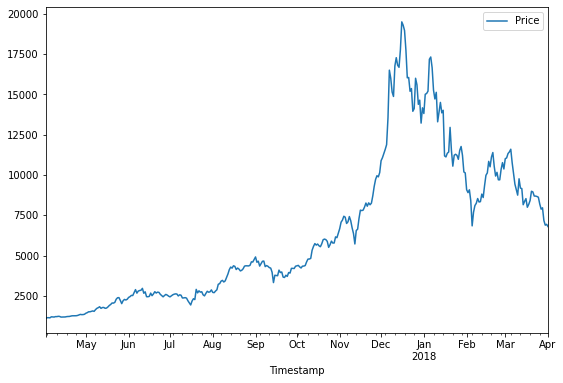

In [49]:
df.plot(figsize=(9,6)) # x-axis: column-0 -> Timestamp; y-axis: column-1 -> Price
# Behind The Scenes -> Using The "matplotlib.pyplot" Interface

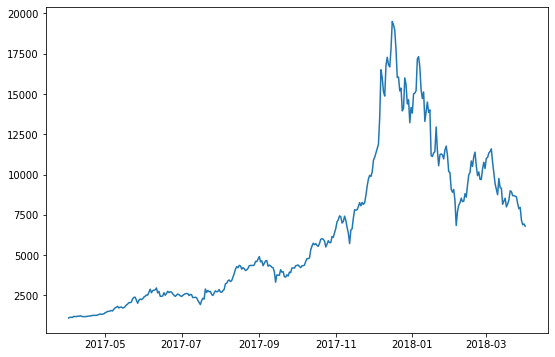

In [44]:
plt.figure(figsize = (9,6))
plt.plot(df.index, df['Price']) # Directly Using matplotlib.pyplot's Interface / Matplotlib's Global API (Not Recommended)
# Instead, Use The Matplotlib OOP API

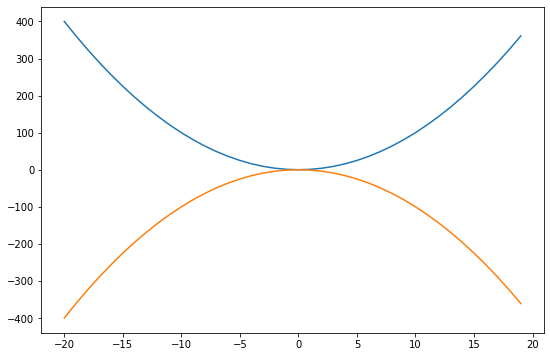

In [47]:
x = np.arange(-20 , 20)
plt.figure(figsize = (9,6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))
# Each "plt" Function Alters The Global State. 
# To Set Settings Of Your Own Plot, You Can Use The 'plt.figure()' Function. Other Methods Like 'plt.title()' Keep Altering The Global Plot.

Text(0.5, 1.0, 'Squares Of X (Positive And Negated)')

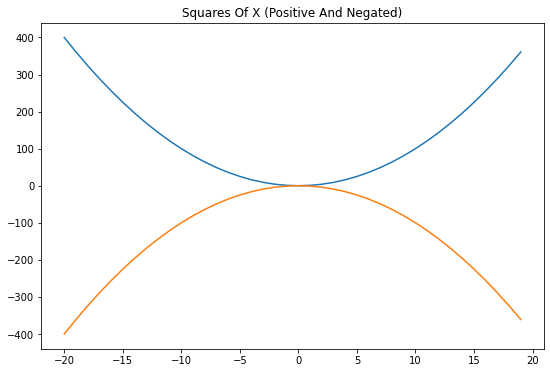

In [41]:
plt.figure(figsize = (9,6)) # Alters The Local Size Of Our Plot
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))
plt.title("Squares Of X (Positive And Negated)")

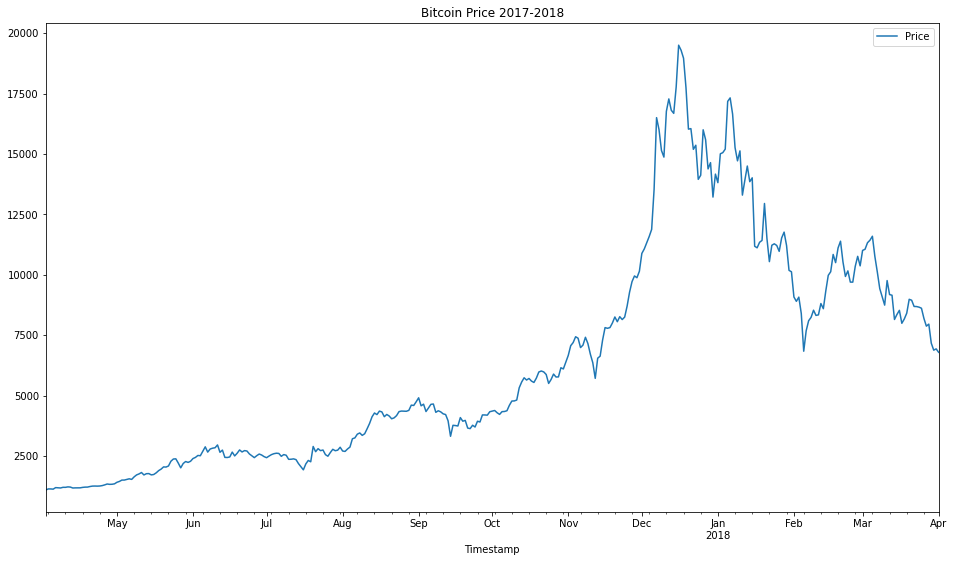

In [50]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

## **Dataset Used (CSV) :  BTC-Market-Price (Two Columns / Challenging Parsing)**

In [51]:
eth = pd.read_csv('data/eth-price.csv')
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [54]:
# Parse Dates As Datetime Objects 
eth = pd.read_csv('data/eth-price.csv', parse_dates = True) # Does Not Work, UnixTimeStamp Data-Type Remains Unchanged.
# Reason: This Is Because The "parse_dates = True" Parameter Will Instruct Pandas To Parse The Index Of The DataFrame. If You Want To Parse Any Other Column, You Must Explicitly Pass The Column Position Or Name.
print(eth.dtypes, "\n")
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object 



,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [59]:
# Working Method
eth['UnixTimeStamp'] = pd.to_datetime(eth['UnixTimeStamp'])
print(pd.read_csv('data/eth-price.csv', parse_dates=[0]).head(), "\n")

# Problem -> Precision Of The Datetime Object
eth # Display The 'eth' DataFrame

   Date(UTC)  UnixTimeStamp  Value
0 2017-04-02     1491091200  48.55
1 2017-04-03     1491177600  44.13
2 2017-04-04     1491264000  44.43
3 2017-04-05     1491350400  44.90
4 2017-04-06     1491436800  43.23 



,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1970-01-01 00:00:01.491091200,48.55
2017-04-03,1970-01-01 00:00:01.491177600,44.13
2017-04-04,1970-01-01 00:00:01.491264000,44.43
2017-04-05,1970-01-01 00:00:01.491350400,44.90
2017-04-06,1970-01-01 00:00:01.491436800,43.23
...,...,...
2018-03-28,1970-01-01 00:00:01.522195200,445.93
2018-03-29,1970-01-01 00:00:01.522281600,383.90
2018-03-30,1970-01-01 00:00:01.522368000,393.82


In [56]:
# Correct Data Cleaning Procedure
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())
eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


## **Combining Both The DataFrames Into One (Same Index Values)**
## 1) The "eth-price.csv" DataFrame And The "btc-market-price.csv" DataFrame Are Combined Into One

In [60]:
# Step 1: Create An Empty DataFrame, With Index Values From The Bitcoin Prices
# df -> "btc-market-price.csv"
# eth -> "eth-price.csv"
prices = pd.DataFrame(index=df.index)
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [61]:
# Step 2: Add Each Column From "eth" And "df" Manually
prices['Bitcoin'] = df['Price']
prices['Ether'] = eth['Value']
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


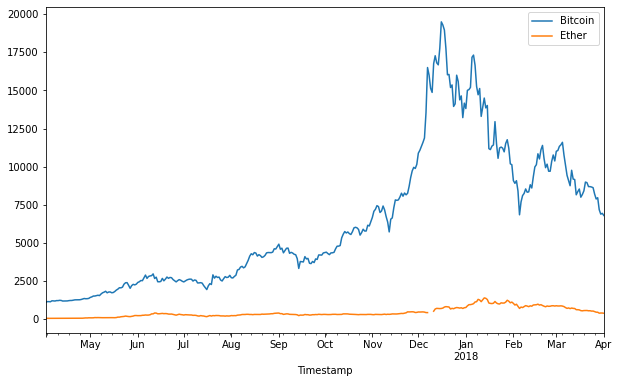

In [63]:
prices.plot(figsize=(10, 6)) # Underlying Working Reminder: Calls The "matplotlib.pyplot" Global Interface

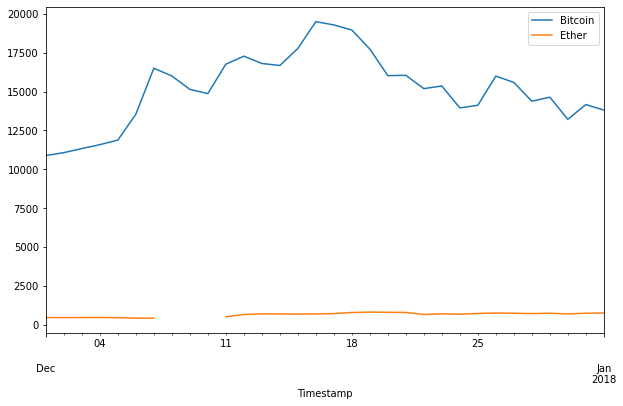

In [65]:
# Understanding Problems Within The Plot: Tiny Gap In Data Between December 2017 and January 2018
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(10, 6)) # Zoom Into The Problematic Region
# Use Predictive Analytics To Fill In The Gap (Not A Part Of Pandas Package)